In [123]:
import irve
import importlib
importlib.reload(irve)
from irve import *

In [124]:
irve.df.shape

(67044, 57)

In [125]:
df_geo = irve.df[irve.df["consolidated_is_lon_lat_correct"]==True]
df_geo = df_geo[["consolidated_longitude","consolidated_latitude"]].dropna()

In [126]:
import pydeck as pdk

layer = pdk.Layer(
    "HexagonLayer",
    df_geo,
    get_position=["consolidated_longitude", "consolidated_latitude"],
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,
    coverage=1,
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=2.476711,
    latitude=45.476584,
    zoom=5.2,
    min_zoom=5.2,
    max_zoom=17,
    pitch=40.5,
    bearing=4.36,
)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html("img/5_geo.html")

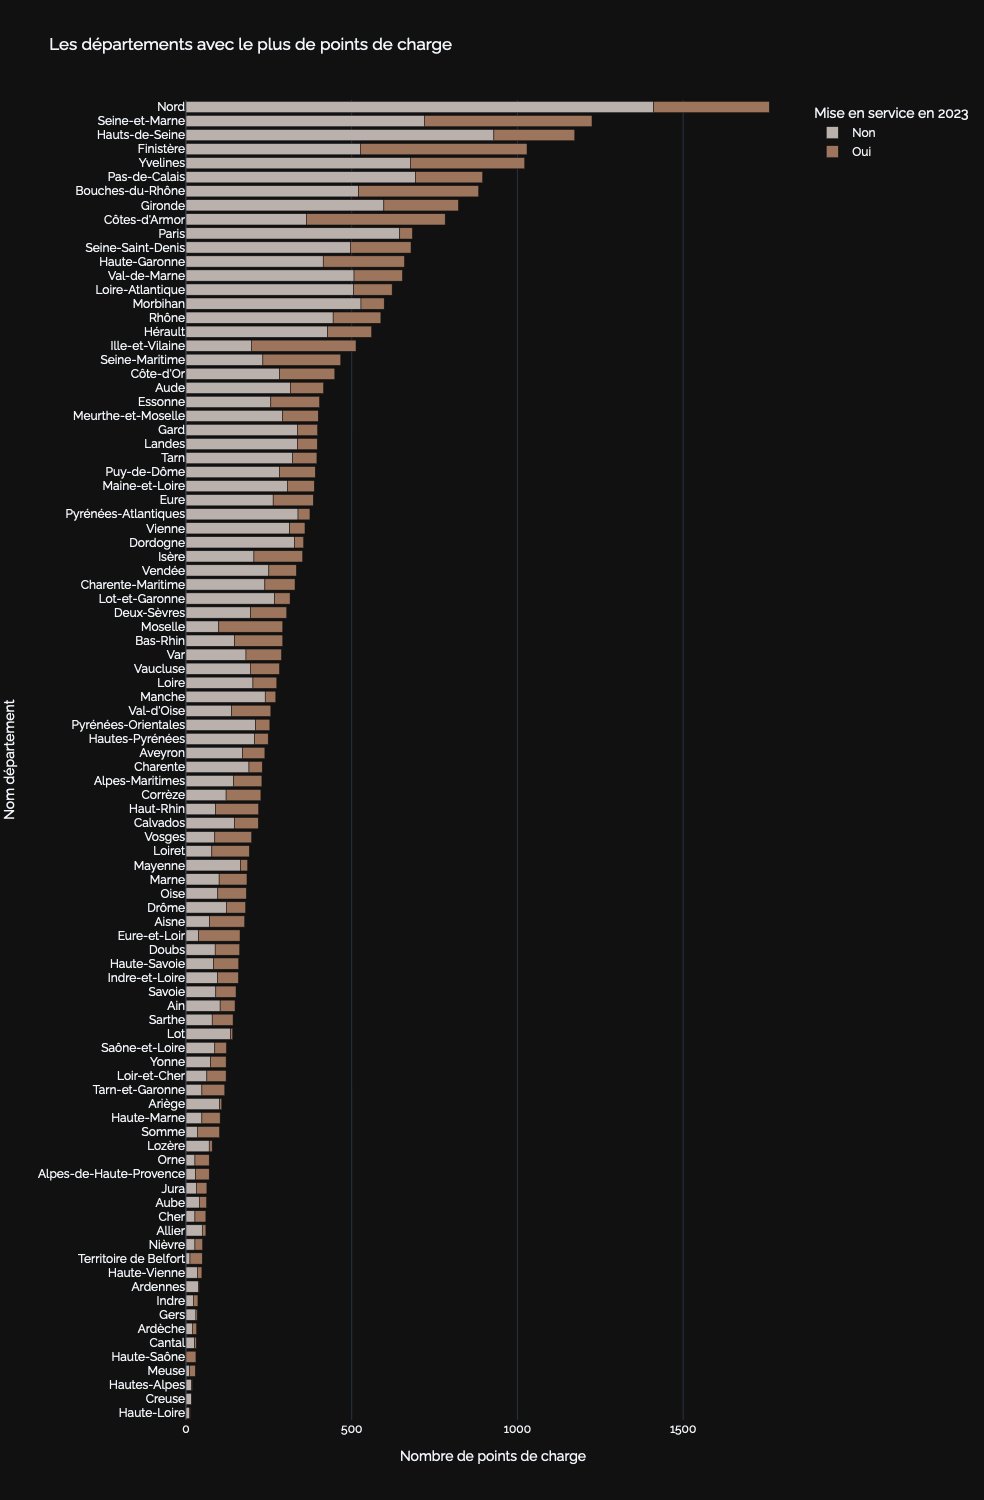

In [127]:
dfv = irve.df.groupby(["nom_departement","mis_en_service_cette_annee"], as_index=False)\
  ["id_pdc_itinerance"]\
  .count()

fig = px.bar(dfv
      ,x = "id_pdc_itinerance"  
      ,y = "nom_departement"  
      ,orientation="h"
      ,height=1500
      ,color="mis_en_service_cette_annee"
      ,title="Les départements avec le plus de points de charge"
      ,labels={"nom_departement": "Nom département",
               "mis_en_service_cette_annee": "Mise en service en 2023"
              }
      ,color_discrete_sequence=px.colors.qualitative.T10[::-1])\
  .update_yaxes(categoryorder="total ascending")

fig.update_layout(
    font_family="Raleway",
    xaxis_title = "Nombre de points de charge"
)

fig.write_image("img/5_dep.svg")
fig